In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
dff = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
dff.shape

(568454, 10)

In [4]:
dff.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
balanced_sample = dff.groupby('Score').apply(lambda x: x.sample(n=600, random_state=42)).reset_index(drop=True)
balanced_sample['Score'].value_counts()

/tmp/ipykernel_24/3005395411.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_sample = dff.groupby('Score').apply(lambda x: x.sample(n=600, random_state=42)).reset_index(drop=True)


Score
1    600
2    600
3    600
4    600
5    600
Name: count, dtype: int64

## **EDA**

<Axes: title={'center': 'count of reviews by stars'}, xlabel='Score'>

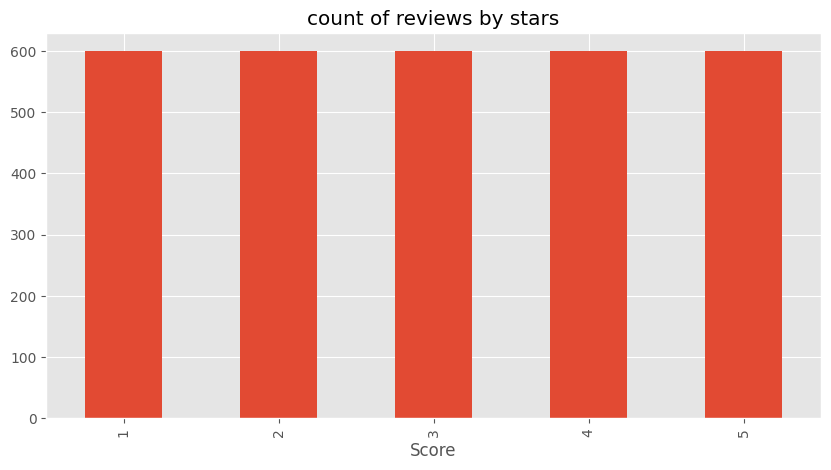

In [6]:
balanced_sample['Score'].value_counts().sort_index().plot(kind = 'bar',
                                             title = 'count of reviews by stars', figsize = (10, 5))

In [7]:
balanced_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,348179,B000O160KE,A1P9NJ7JQZRHCT,Professor X,0,1,1,1259452800,Sweet & Low without the cancer.,"If you like the (bitter) taste of Sweet & Low,..."
1,306508,B004NB79VU,ACP87CNOMX1DJ,"Tanya L. Ouzts ""wedding mom""",0,0,1,1337558400,wedding mom,item was much smaller than appeared on line. ...
2,228313,B003VXHGPK,A25UTJ1AXFC0Z9,Judy Armstrong,1,2,1,1323388800,Don't waste your money or your Keurig on this!,This coffee tastes very flavorful and is not t...
3,448369,B0030FGMFY,A2JER2JSWJG5VL,Jaybee,4,5,1,1313798400,MADE IN CHINA!!!,I bought these for my Dalmatian for the first ...
4,515441,B004S04X4W,AY1EF0GOH80EK,Natasha Stryker,3,6,1,1324252800,Tastes like cheap meat and salt,"I guess I am in the minority, but this hash pr..."
...,...,...,...,...,...,...,...,...,...,...
2995,498089,B000YMFVQC,A11ZFR98DMX3VP,B. Callahan,8,8,5,1223164800,Extremely high quality,These Tuna filets packed in Olive Oil are extr...
2996,367836,B003B3OOPA,A2LMW4XAG8U57Y,"Barbara L. Sehestedt ""Mommy and Grandma""",2,3,5,1344988800,Coconut Oil for Everything,Are you kidding me? I can't even begin to lis...
2997,330364,B003LKDVJI,AORNV9VFD3SF8,"R. DeSisto ""bobinAustin""",2,2,5,1326240000,Great value,This was a great deal compared to other produc...
2998,66399,B0039555VM,A3F55K281O28Y0,D. Reisinger,2,2,5,1291248000,Perfect Anytime,"This blend is perfect for any time of the day,..."


## **Basic NLTK**

In [8]:
ex = balanced_sample['Text'][499]
ex

'Item was in an envelope that was battered and very heavy, which was odd.  Upon opening I discovered why the envelope was so heavy, the chocolate was COMPLETELY melted.  They need to find a better way to ship this product, until then, I would STAY AWAY from ordering this item from THIS COMPANY!'

In [9]:
nltk.word_tokenize(ex)

['Item',
 'was',
 'in',
 'an',
 'envelope',
 'that',
 'was',
 'battered',
 'and',
 'very',
 'heavy',
 ',',
 'which',
 'was',
 'odd',
 '.',
 'Upon',
 'opening',
 'I',
 'discovered',
 'why',
 'the',
 'envelope',
 'was',
 'so',
 'heavy',
 ',',
 'the',
 'chocolate',
 'was',
 'COMPLETELY',
 'melted',
 '.',
 'They',
 'need',
 'to',
 'find',
 'a',
 'better',
 'way',
 'to',
 'ship',
 'this',
 'product',
 ',',
 'until',
 'then',
 ',',
 'I',
 'would',
 'STAY',
 'AWAY',
 'from',
 'ordering',
 'this',
 'item',
 'from',
 'THIS',
 'COMPANY',
 '!']

In [10]:
nltk.pos_tag(ex)

[('I', 'PRP'),
 ('t', 'VBP'),
 ('e', 'JJ'),
 ('m', 'NN'),
 (' ', 'NNP'),
 ('w', 'VBZ'),
 ('a', 'DT'),
 ('s', 'JJ'),
 (' ', 'NN'),
 ('i', 'NN'),
 ('n', 'VBP'),
 (' ', 'PDT'),
 ('a', 'DT'),
 ('n', 'JJ'),
 (' ', 'NN'),
 ('e', 'NN'),
 ('n', 'JJ'),
 ('v', 'NN'),
 ('e', 'NN'),
 ('l', 'NN'),
 ('o', 'NN'),
 ('p', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('t', 'NN'),
 ('h', 'VBD'),
 ('a', 'DT'),
 ('t', 'NN'),
 (' ', 'NNP'),
 ('w', 'VBZ'),
 ('a', 'DT'),
 ('s', 'NN'),
 (' ', 'NN'),
 ('b', 'VBD'),
 ('a', 'DT'),
 ('t', 'NN'),
 ('t', 'NN'),
 ('e', 'NN'),
 ('r', 'NN'),
 ('e', 'NN'),
 ('d', 'NN'),
 (' ', 'VBZ'),
 ('a', 'DT'),
 ('n', 'JJ'),
 ('d', 'NN'),
 (' ', 'NNP'),
 ('v', 'NN'),
 ('e', 'NN'),
 ('r', 'NN'),
 ('y', 'NN'),
 (' ', 'NNP'),
 ('h', 'NN'),
 ('e', 'VBZ'),
 ('a', 'DT'),
 ('v', 'NN'),
 ('y', 'NN'),
 (',', ','),
 (' ', 'NNP'),
 ('w', 'VBP'),
 ('h', 'NN'),
 ('i', 'JJ'),
 ('c', 'VBP'),
 ('h', 'JJ'),
 (' ', 'NNP'),
 ('w', 'VBD'),
 ('a', 'DT'),
 ('s', 'JJ'),
 (' ', 'NN'),
 ('o', 'NN'),
 ('d', 'NN'),
 

## **VADER Sentiment Scoring**

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
sia.polarity_scores("I hate not having this it's great")

{'neg': 0.314, 'neu': 0.339, 'pos': 0.347, 'compound': 0.1027}

In [13]:
sia.polarity_scores(ex)

{'neg': 0.043, 'neu': 0.897, 'pos': 0.06, 'compound': 0.2244}

### **Extract polarity for the entire dataset**

In [14]:
res = {}
for i, row in tqdm(balanced_sample.iterrows(), total = len(balanced_sample)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [15]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index' : 'Id'})
vaders = vaders.merge(balanced_sample, how = 'left')

In [16]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,348179,0.069,0.809,0.122,0.8271,B000O160KE,A1P9NJ7JQZRHCT,Professor X,0,1,1,1259452800,Sweet & Low without the cancer.,"If you like the (bitter) taste of Sweet & Low,..."
1,306508,0.069,0.931,0.000,-0.4767,B004NB79VU,ACP87CNOMX1DJ,"Tanya L. Ouzts ""wedding mom""",0,0,1,1337558400,wedding mom,item was much smaller than appeared on line. ...
2,228313,0.134,0.847,0.019,-0.9536,B003VXHGPK,A25UTJ1AXFC0Z9,Judy Armstrong,1,2,1,1323388800,Don't waste your money or your Keurig on this!,This coffee tastes very flavorful and is not t...
3,448369,0.048,0.913,0.039,-0.3400,B0030FGMFY,A2JER2JSWJG5VL,Jaybee,4,5,1,1313798400,MADE IN CHINA!!!,I bought these for my Dalmatian for the first ...
4,515441,0.063,0.821,0.115,0.8443,B004S04X4W,AY1EF0GOH80EK,Natasha Stryker,3,6,1,1324252800,Tastes like cheap meat and salt,"I guess I am in the minority, but this hash pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,498089,0.000,0.877,0.123,0.7082,B000YMFVQC,A11ZFR98DMX3VP,B. Callahan,8,8,5,1223164800,Extremely high quality,These Tuna filets packed in Olive Oil are extr...
2996,367836,0.000,0.714,0.286,0.8910,B003B3OOPA,A2LMW4XAG8U57Y,"Barbara L. Sehestedt ""Mommy and Grandma""",2,3,5,1344988800,Coconut Oil for Everything,Are you kidding me? I can't even begin to lis...
2997,330364,0.000,0.736,0.264,0.7783,B003LKDVJI,AORNV9VFD3SF8,"R. DeSisto ""bobinAustin""",2,2,5,1326240000,Great value,This was a great deal compared to other produc...
2998,66399,0.000,0.908,0.092,0.6986,B0039555VM,A3F55K281O28Y0,D. Reisinger,2,2,5,1291248000,Perfect Anytime,"This blend is perfect for any time of the day,..."


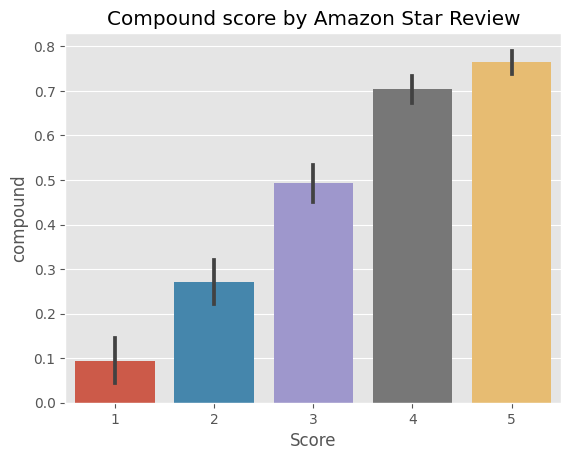

In [17]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound score by Amazon Star Review')
plt.show()

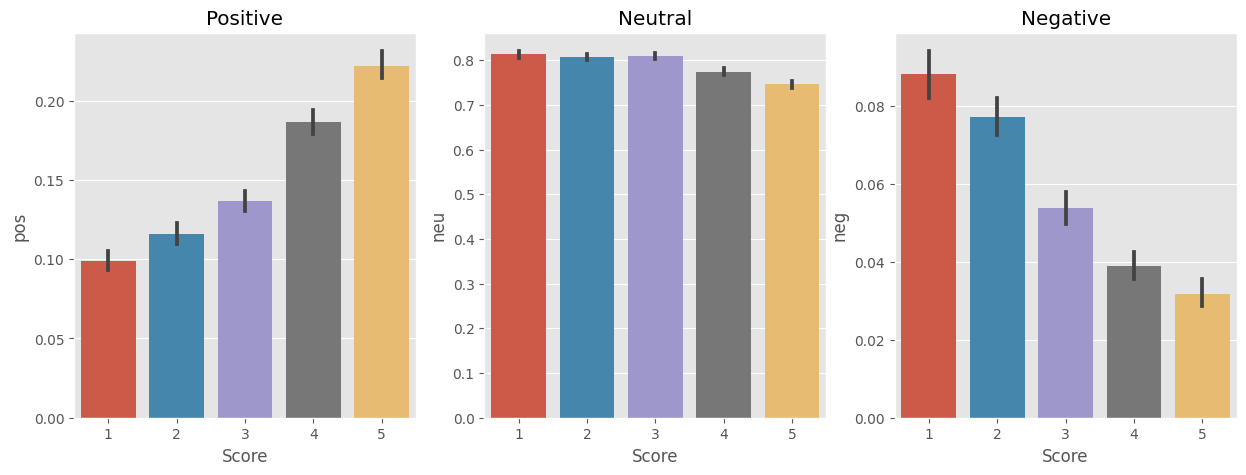

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

## **Roberta scoring**

In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [20]:
modell = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(modell)
model = AutoModelForSequenceClassification.from_pretrained(modell)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [21]:
#vader
print(ex)
sia.polarity_scores(ex)

Item was in an envelope that was battered and very heavy, which was odd.  Upon opening I discovered why the envelope was so heavy, the chocolate was COMPLETELY melted.  They need to find a better way to ship this product, until then, I would STAY AWAY from ordering this item from THIS COMPANY!


{'neg': 0.043, 'neu': 0.897, 'pos': 0.06, 'compound': 0.2244}

In [22]:
#roberta
en = tokenizer(ex, return_tensors = 'pt')
output = model(**en)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.8841409, 'roberta_neu': 0.10359659, 'roberta_pos': 0.012262504}


In [23]:
def roberta_scores(ex):
    en = tokenizer(ex, return_tensors = 'pt')
    output = model(**en)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

## **Transformers Pipeline**

In [24]:
from transformers import pipeline

2024-07-31 11:19:08.949904: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 11:19:08.950063: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 11:19:09.080048: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [26]:
sent_pipeline("boo")

[{'label': 'NEGATIVE', 'score': 0.9715901017189026}]

## **BERT**

In [27]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

bert = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(bert)
model = AutoModelForSequenceClassification.from_pretrained(bert)
bert_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [28]:
bert_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

sample_texts = [
    "I love this product! It's absolutely amazing.",
    "This was a terrible experience. I'm very disappointed.",
    "It's okay, but not great. I expected more.",
    "What a fantastic day!",
    "I'm not sure how I feel about this."
]

for text in sample_texts:
    result = bert_pipeline(text)
    print(f"Text: {text}\nSentiment: {result}\n")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Text: I love this product! It's absolutely amazing.
Sentiment: [{'label': '5 stars', 'score': 0.9704833030700684}]

Text: This was a terrible experience. I'm very disappointed.
Sentiment: [{'label': '1 star', 'score': 0.7590466737747192}]

Text: It's okay, but not great. I expected more.
Sentiment: [{'label': '3 stars', 'score': 0.8624864816665649}]

Text: What a fantastic day!
Sentiment: [{'label': '5 stars', 'score': 0.9407933354377747}]

Text: I'm not sure how I feel about this.
Sentiment: [{'label': '3 stars', 'score': 0.4947236180305481}]



## **Compine models & Compare**

In [29]:
from transformers import BertTokenizer, RobertaTokenizer
from tqdm import tqdm

# Initialize tokenizers for BERT and RoBERTa
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def truncate_text(text, tokenizer, max_length=512):
    """
    Truncate the text to the specified maximum length based on the tokenizer.
    """
    tokens = tokenizer.tokenize(text)
    if len(tokens) > max_length:
        tokens = tokens[:max_length]
    return tokenizer.convert_tokens_to_string(tokens)

def process_bert_results(bert_res):
    return {f"bert_{res['label']}": res['score'] for res in bert_res}

def process_pipeline_results(pipe_res):
    return {f"pipe_{res['label']}": res['score'] for res in pipe_res}

res = {}

for i, row in tqdm(balanced_sample.iterrows(), total=len(balanced_sample)):
    try:
        text = row['Text']
        myid = row['Id']

        # Truncate text for BERT and RoBERTa
        truncated_text_bert = truncate_text(text, bert_tokenizer)
        truncated_text_roberta = truncate_text(text, roberta_tokenizer)

        # VADER analysis
        vader_res = sia.polarity_scores(text)
        vader_re = {f'vader_{key}': value for key, value in vader_res.items()}

        # RoBERTa analysis
        roberta_res = roberta_scores(truncated_text_roberta)

        # Pipeline results
        pipe_res_list = sent_pipeline(truncated_text_roberta)
        pipe_res = process_pipeline_results(pipe_res_list)

        # BERT results
        bert_res_list = bert_pipeline(truncated_text_bert)
        bert_res = process_bert_results(bert_res_list)

        # Combine all results
        both = {**vader_re, **roberta_res, **pipe_res, **bert_res}

        res[myid] = both
        
    except RuntimeError:
        print(f'Broke for id {myid}')
    except Exception as e:
        print(f"An error occurred for id {myid}: {e}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

  1%|          | 20/3000 [00:09<16:02,  3.10it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512). Running this sequence through the model will result in indexing errors


Broke for id 426808


  2%|▏         | 49/3000 [00:19<19:57,  2.46it/s]

Broke for id 59674


  6%|▌         | 176/3000 [01:04<17:24,  2.70it/s]

Broke for id 375504


  6%|▌         | 185/3000 [01:06<09:22,  5.00it/s]

Broke for id 387227
Broke for id 239218


  7%|▋         | 198/3000 [01:10<13:15,  3.52it/s]

Broke for id 471615


  7%|▋         | 207/3000 [01:13<14:34,  3.19it/s]

Broke for id 226249


 11%|█         | 317/3000 [01:54<11:56,  3.74it/s]

Broke for id 224295


 11%|█         | 318/3000 [01:55<20:36,  2.17it/s]

Broke for id 96837


 12%|█▏        | 368/3000 [02:14<16:57,  2.59it/s]

Broke for id 70754


 14%|█▍        | 423/3000 [02:33<09:41,  4.43it/s]

Broke for id 149951


 20%|██        | 612/3000 [03:41<18:32,  2.15it/s]

Broke for id 285912


 21%|██        | 633/3000 [03:48<16:28,  2.39it/s]

Broke for id 92964


 22%|██▏       | 646/3000 [03:53<13:17,  2.95it/s]

Broke for id 125971


 22%|██▏       | 652/3000 [03:55<14:06,  2.77it/s]

Broke for id 169577


 25%|██▍       | 746/3000 [04:32<16:38,  2.26it/s]

Broke for id 419994


 28%|██▊       | 830/3000 [05:00<11:40,  3.10it/s]

Broke for id 164541


 35%|███▌      | 1055/3000 [06:25<14:14,  2.28it/s]

Broke for id 299927


 41%|████      | 1227/3000 [07:28<07:52,  3.75it/s]

Broke for id 436692


 42%|████▏     | 1253/3000 [07:39<15:41,  1.86it/s]

Broke for id 433953


 42%|████▏     | 1266/3000 [07:44<15:39,  1.85it/s]

Broke for id 253355


 43%|████▎     | 1297/3000 [07:57<10:31,  2.70it/s]

Broke for id 211721


 47%|████▋     | 1413/3000 [08:43<09:10,  2.88it/s]

Broke for id 487637


 52%|█████▏    | 1552/3000 [09:37<08:03,  2.99it/s]

Broke for id 22005


 54%|█████▎    | 1612/3000 [09:57<05:36,  4.12it/s]

Broke for id 411251


 55%|█████▍    | 1644/3000 [10:09<07:20,  3.08it/s]

Broke for id 122074


 55%|█████▌    | 1653/3000 [10:11<07:52,  2.85it/s]

Broke for id 364760


 58%|█████▊    | 1755/3000 [10:51<06:12,  3.35it/s]

Broke for id 164535


 62%|██████▏   | 1872/3000 [11:35<06:11,  3.04it/s]

Broke for id 119823


 64%|██████▍   | 1930/3000 [11:57<04:39,  3.83it/s]

Broke for id 500875


 64%|██████▍   | 1933/3000 [11:58<05:36,  3.17it/s]

Broke for id 333994


 67%|██████▋   | 2010/3000 [12:27<04:12,  3.92it/s]

Broke for id 498247


 69%|██████▉   | 2069/3000 [12:48<03:19,  4.68it/s]

Broke for id 142064


 70%|██████▉   | 2090/3000 [12:56<03:49,  3.97it/s]

Broke for id 193354


 70%|███████   | 2107/3000 [13:02<04:58,  2.99it/s]

Broke for id 264569


 72%|███████▏  | 2154/3000 [13:16<03:27,  4.07it/s]

Broke for id 290994


 75%|███████▌  | 2262/3000 [13:53<03:34,  3.44it/s]

Broke for id 301276


 78%|███████▊  | 2332/3000 [14:24<05:11,  2.14it/s]

Broke for id 41972


 96%|█████████▌| 2885/3000 [17:27<00:33,  3.48it/s]

Broke for id 356190


100%|██████████| 3000/3000 [18:02<00:00,  2.77it/s]


In [30]:
res_df = pd.DataFrame(res).T
res_df = res_df.reset_index().rename(columns = {'index' : 'Id'})
res_df = res_df.merge(balanced_sample, how = 'left')
res_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,pipe_NEGATIVE,bert_2 stars,...,bert_5 stars,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,348179,0.069,0.809,0.122,0.8271,0.169884,0.350352,0.249062,0.982931,0.350352,...,NaN,B000O160KE,A1P9NJ7JQZRHCT,Professor X,0,1,1,1259452800,Sweet & Low without the cancer.,"If you like the (bitter) taste of Sweet & Low,..."
1,306508,0.069,0.931,0.000,-0.4767,0.244283,0.467174,0.253524,0.999276,0.467174,...,NaN,B004NB79VU,ACP87CNOMX1DJ,"Tanya L. Ouzts ""wedding mom""",0,0,1,1337558400,wedding mom,item was much smaller than appeared on line. ...
2,228313,0.134,0.847,0.019,-0.9536,0.489671,0.462608,0.044908,0.998963,NaN,...,NaN,B003VXHGPK,A25UTJ1AXFC0Z9,Judy Armstrong,1,2,1,1323388800,Don't waste your money or your Keurig on this!,This coffee tastes very flavorful and is not t...
3,448369,0.048,0.913,0.039,-0.3400,0.327176,0.314937,0.164815,0.975217,NaN,...,NaN,B0030FGMFY,A2JER2JSWJG5VL,Jaybee,4,5,1,1313798400,MADE IN CHINA!!!,I bought these for my Dalmatian for the first ...
4,515441,0.063,0.821,0.115,0.8443,0.217516,0.313285,0.253119,0.998267,0.313285,...,NaN,B004S04X4W,AY1EF0GOH80EK,Natasha Stryker,3,6,1,1324252800,Tastes like cheap meat and salt,"I guess I am in the minority, but this hash pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,498089,0.000,0.877,0.123,0.7082,0.001969,0.002316,0.007228,NaN,NaN,...,0.860278,B000YMFVQC,A11ZFR98DMX3VP,B. Callahan,8,8,5,1223164800,Extremely high quality,These Tuna filets packed in Olive Oil are extr...
2957,367836,0.000,0.714,0.286,0.8910,0.506103,0.337914,0.123305,0.999231,NaN,...,NaN,B003B3OOPA,A2LMW4XAG8U57Y,"Barbara L. Sehestedt ""Mommy and Grandma""",2,3,5,1344988800,Coconut Oil for Everything,Are you kidding me? I can't even begin to lis...
2958,330364,0.000,0.736,0.264,0.7783,0.002256,0.008549,0.098501,NaN,NaN,...,NaN,B003LKDVJI,AORNV9VFD3SF8,"R. DeSisto ""bobinAustin""",2,2,5,1326240000,Great value,This was a great deal compared to other produc...
2959,66399,0.000,0.908,0.092,0.6986,0.000921,0.002853,0.036857,NaN,NaN,...,NaN,B0039555VM,A3F55K281O28Y0,D. Reisinger,2,2,5,1291248000,Perfect Anytime,"This blend is perfect for any time of the day,..."


In [31]:
res_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'pipe_NEGATIVE',
       'bert_2 stars', 'bert_1 star', 'pipe_POSITIVE', 'bert_3 stars',
       'bert_4 stars', 'bert_5 stars', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

## **Review Examples**

### **pos sentiment with 1 star**

In [32]:
res_df.query('Score == 1').sort_values('roberta_pos', ascending = False)['Text'].values[0]

'You either Like Tim Burton or you don\'t,I fall in the latter.BeetleJuice is not a big deal for me despite it\'s huge following and Burton\'s Following,While there are funny moments I am not the type to like Alice In Wonderland type films that are "trippy".I think the Highlight for Me Is Robert Goulet(Goulet!robert gouleeeeeeeeet!)and Wionna Ryder,I can\'t stand Baldwin.'

In [33]:
res_df.query('Score == 1').sort_values('vader_pos', ascending = False)['Text'].values[0]

"I bought this today because I am absolutely in love with a certain coffee chain based out of seattle's chai tea latte. I was hoping that this would help me save a little money and still give me that delicious taste. Wrong. This was soooo sweet. I have the biggest sweet tooth out of anyone I know and i couldn't even drink one of these. Not worth it."

In [34]:
res_df.query('Score == 1').sort_values('pipe_POSITIVE', ascending = False)['Text'].values[0]

"I LOVE edamame but when I tasted your edamame product I wasn't even able to swallow it.  It was really so dry and thick in my mouth I couldn't even get it down.  Your other products (specifically the corn) is the most amazing wonderful natural tasting corn I ever had. and your fruit products are also wonderful.  I gave the edamame one star because there wasn't an option to give it a zero."

In [35]:
res_df.query('Score == 1').sort_values('bert_5 stars', ascending = False)['Text'].values[0]

"I love my Keurig, and I love most of the Keurig coffees.  This is instant coffee with instant milk and far too much sugar.  I don't know anyone I dislike enough to dump the rest of the box on."

### **neg sentiment with 5 star**

In [36]:
res_df.query('Score == 5').sort_values('roberta_neg', ascending = False)['Text'].values[0]

"Are you kidding me?  I can't even begin to list all of the ways I use this amazing coconut oil.  It would be easier to list what it is NOT good for.  Let me think....uh....nothing."

In [37]:
res_df.query('Score == 5').sort_values('vader_neg', ascending = False)['Text'].values[0]

'These are my favorite suckers ever!!!<br />They are sooo good!<br />I am having trouble finding them in stores this year :('

In [38]:
res_df.query('Score == 5').sort_values('pipe_NEGATIVE', ascending = False)['Text'].values[0]

'my local stores do not seem to carry it or if they do they run out quickly and its usually much more'

In [39]:
res_df.query('Score == 5').sort_values('bert_1 star', ascending = False)['Text'].values[0]

"Are you kidding me?  I can't even begin to list all of the ways I use this amazing coconut oil.  It would be easier to list what it is NOT good for.  Let me think....uh....nothing."